<a href="https://colab.research.google.com/github/iSriBalaji/Kaggle-Notebooks/blob/main/akaruppa_sribalaj_assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part 1
## Defining the Mario World

#### We(Akshaya & Sri Balaji) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that We did not receive any external help, coaching or contributions during the production of this work.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gym import spaces, Env, make
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from matplotlib.text import Annotation
from google.colab import widgets

In [2]:
class Mario(Env):
    metadata = { 'render.modes': []}

    def __init__(self):
        ### Creating an 5x5 game space
        self.observation_space = spaces.Discrete(25)

        ### Defining 4 actions
        self.action_space = spaces.Discrete(4)

        ### Keyboard Inputs
        self.key_inputs = ["up", "down", "right", "left"]

        ### Setting the maximum steps to 12
        self.max_timesteps = 12

    def step(self, action):
        ### Defining the actions to be taken depending on the input
        if action == "right":
            self.agent_pos[0] += 1
        if action == "left":
            self.agent_pos[0] -= 1
        if action == "up":
            self.agent_pos[1] += 1
        if action == "down":
            self.agent_pos[1] -= 1

        ### Clipping the the agent if it goes out of the defined grid, here our limit is from 0 to 4
        self.agent_pos = np.clip(self.agent_pos, 0, 4)

        ### Defining rewards for each state
        if (self.agent_pos == list(self.goal_pos)).all():
          reward = 100
        elif self.agent_pos.tolist() in self.coin:
          reward = 15
        elif (self.agent_pos == list(self.mushroom)).all():
          reward = 50
        elif (self.agent_pos == list(self.bonus)).all():
          reward = np.random.choice([20,35,45])       ## Question mark provides random bonus to Mario
        elif (self.agent_pos == list(self.flytrap)).all():
          reward = -25
        elif (self.agent_pos == list(self.turtle)).all():
          reward = -75
        else:
          reward = 0

        self.timestep += 1
        done = True if (self.timestep >= self.max_timesteps) else False
        goal_achieved = True if (self.agent_pos == self.goal_pos).all() else False
        logs = {"position":self.agent_pos, "reward": reward, "done":done, "goal_achieved":goal_achieved}
        return logs

    def reset(self):
        self.timestep = 0
        self.agent_pos = [0, 0]  ## Keeping the agent position as list as it is the only object that will change

        ### Goal
        self.goal_pos = (4,4)

        ### Positive Rewards
        self.coin = [[1,2],[3,4]]
        self.coin_cnt = 2
        self.mushroom = (0,4)
        self.bonus = (3,2)

        ### Negative Rewards
        self.turtle = (2,1)
        self.flytrap = (1,3)

        return True

    def render(self):
      fig, ax = plt.subplots(figsize = (7,7))
      ax.set_xlim(0, 5)
      ax.set_ylim(0, 5)

      def plotImage(plot_pos):
        mario_cor, coin_cor, mushroom_cor, bonus_cor, flytrap_cor, turtle_cor, palace_cor = [False] * 7
      
        if np.array_equal(self.agent_pos, plot_pos):
          mario_cor = True
        if self.coin_cnt > 0:
          if any(np.array_equal(self.coin[i], plot_pos) for i in range(len(self.coin))):
            coin_cor = True
        if np.array_equal(self.mushroom, plot_pos):
          mushroom_cor = True
        if np.array_equal(self.bonus, plot_pos):
          bonus_cor = True
        if np.array_equal(self.flytrap, plot_pos):
          flytrap_cor = True
        if np.array_equal(self.turtle, plot_pos):
          turtle_cor = True
        if np.array_equal(self.goal_pos, plot_pos):
          palace_cor = True

        ### Position of Mario
        if mario_cor and all(not item for item in [coin_cor, mushroom_cor, bonus_cor, flytrap_cor, turtle_cor, palace_cor]):
          hero_ax = AnnotationBbox(OffsetImage(plt.imread('/content/asset/hero.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(hero_ax)

        ### Fixed position of coin
        elif coin_cor and all(not item for item in [mario_cor, mushroom_cor, bonus_cor, flytrap_cor, turtle_cor, palace_cor]):
          coin_ax = AnnotationBbox(OffsetImage(plt.imread('/content/asset/coin.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(coin_ax)
        
        ### Fixed position of turtle
        elif turtle_cor and all(not item for item in [mario_cor, coin_cor, mushroom_cor, bonus_cor, flytrap_cor, palace_cor]):
          turtle_ax = AnnotationBbox(OffsetImage(plt.imread('/content/asset/turtle.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(turtle_ax)

        ### Fixed position of flytrap
        elif flytrap_cor and all(not item for item in [mario_cor, coin_cor, mushroom_cor, bonus_cor, turtle_cor, palace_cor]):
          flytrap_ax = AnnotationBbox(OffsetImage(plt.imread('/content/asset/plant.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(flytrap_ax)
        
        ### Fixed position of mushroom
        elif mushroom_cor and all(not item for item in [mario_cor, coin_cor, bonus_cor, flytrap_cor, turtle_cor, palace_cor]):
          mushroom_ax = AnnotationBbox(OffsetImage(plt.imread('/content/asset/mushroom.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(mushroom_ax)
        
        ### Fixed position of bonus box
        elif bonus_cor and all(not item for item in [mario_cor, coin_cor, mushroom_cor, flytrap_cor, turtle_cor, palace_cor]):
          box_ax = AnnotationBbox(OffsetImage(plt.imread('/content/asset/box.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(box_ax)
        
        ### ### Fixed position of palace
        elif palace_cor and all(not item for item in [mario_cor, coin_cor, mushroom_cor, bonus_cor, flytrap_cor, turtle_cor]):
          castle_ax = AnnotationBbox(OffsetImage(plt.imread('/content/asset/castle.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(castle_ax)

        ### When Mario gets coin
        elif all(item for item in [mario_cor, coin_cor]) and all(not item for item in [mushroom_cor, bonus_cor, flytrap_cor, turtle_cor, palace_cor]):
          self.coin.remove(list(self.agent_pos))
          self.coin_cnt -=1
          if(self.coin_cnt==0):
            self.coin = []
          hero_coin = AnnotationBbox(OffsetImage(plt.imread('/content/asset/hero.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(hero_coin)

        ### When Mario gets mushroom
        elif all(item for item in [mario_cor, mushroom_cor]) and all(not item for item in [flytrap_cor, bonus_cor, coin_cor, turtle_cor, palace_cor]):
          self.mushroom = (-1,-1)
          hero_mush = AnnotationBbox(OffsetImage(plt.imread('/content/asset/hero.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(hero_mush)

        ### When Mario gets a bonus
        elif all(item for item in [mario_cor, bonus_cor]) and all(not item for item in [mushroom_cor, coin_cor, flytrap_cor, turtle_cor, palace_cor]):
          self.bonus = (-1,-1)
          hero_coin = AnnotationBbox(OffsetImage(plt.imread('/content/asset/hero.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(hero_coin)

        ### When Mario get attacked by flytrap
        elif all(item for item in [mario_cor, flytrap_cor]) and all(not item for item in [mushroom_cor, bonus_cor, coin_cor, turtle_cor, palace_cor]):
          hero_coin = AnnotationBbox(OffsetImage(plt.imread('/content/asset/hero.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(hero_coin)

        ### When Mario get attacked by turtle
        elif all(item for item in [mario_cor, turtle_cor]) and all(not item for item in [mushroom_cor, bonus_cor, flytrap_cor, coin_cor, palace_cor]):
          hero_coin = AnnotationBbox(OffsetImage(plt.imread('/content/asset/hero.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(hero_coin)

        ### When Mario reaches the goal
        elif all(item for item in [mario_cor, palace_cor]) and all(not item for item in [mushroom_cor, bonus_cor, flytrap_cor, coin_cor, turtle_cor]):
          hero_coin = AnnotationBbox(OffsetImage(plt.imread('/content/asset/castle.png'), zoom=0.1), np.add(plot_pos, [0.5, 0.5]), frameon = False)
          ax.add_artist(hero_coin)


      env_space = {}

      ### Creating a list of all possible states; for 5x5 we have 25 positions in total
      for i in range(25):
        cur_pos = [i%5, round(i/5)]
        env_space[i] = np.asarray(cur_pos)
  
      for box in env_space:
        plotImage(env_space[box])
      
      plt.xticks([0, 1, 2, 3, 4])
      plt.yticks([0, 1, 2, 3, 4])
      plt.grid()
      plt.show()

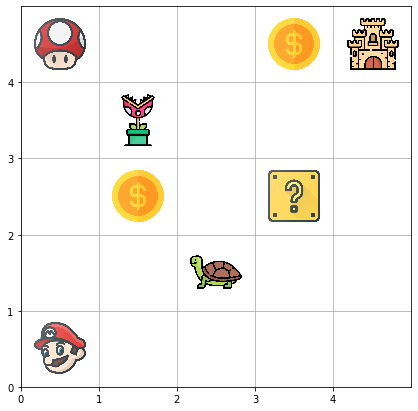

In [3]:
mario_world = Mario()
mario_world.reset()
mario_world.render()

""


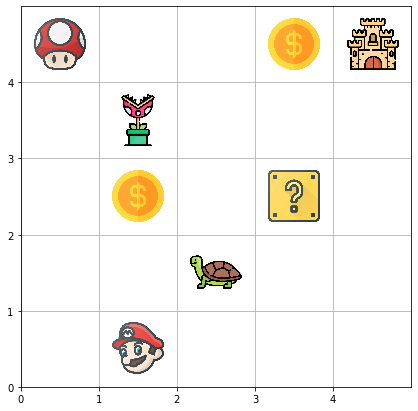


Goal Reached:  False
Current Position:  [1 0]
Chosen Action:  Right
Reward:  0
####################################################### 



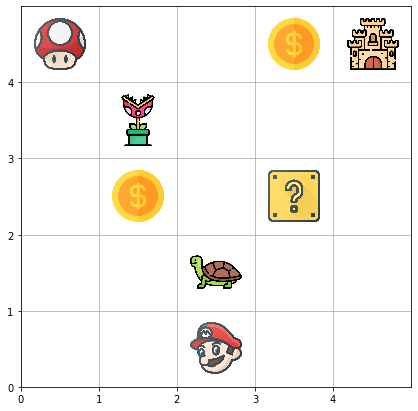


Goal Reached:  False
Current Position:  [2 0]
Chosen Action:  Right
Reward:  0
####################################################### 



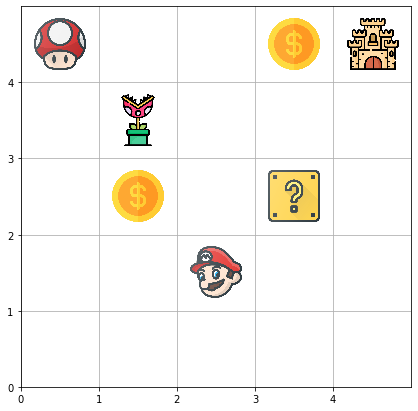


Goal Reached:  False
Current Position:  [2 1]
Chosen Action:  Up
Reward:  -75
####################################################### 



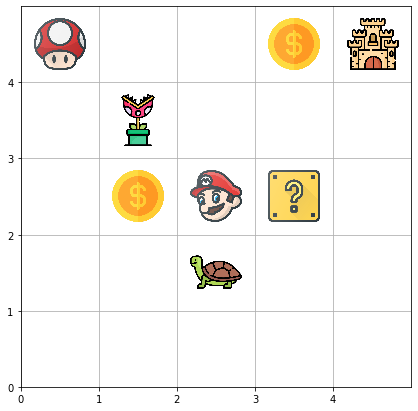


Goal Reached:  False
Current Position:  [2 2]
Chosen Action:  Up
Reward:  0
####################################################### 



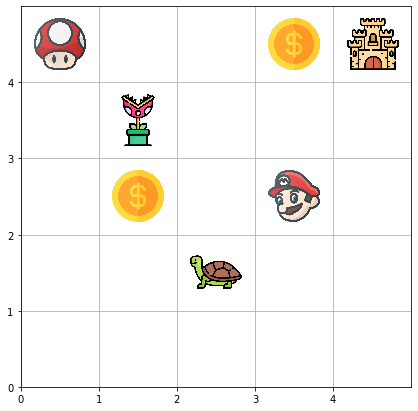


Goal Reached:  False
Current Position:  [3 2]
Chosen Action:  Right
Reward:  45
####################################################### 



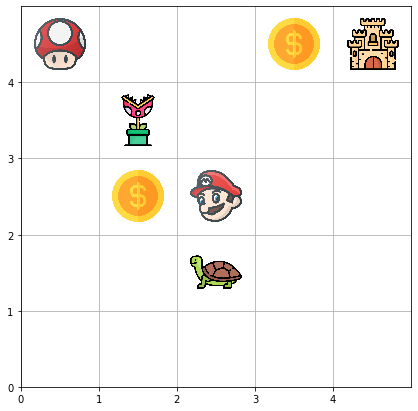


Goal Reached:  False
Current Position:  [2 2]
Chosen Action:  Left
Reward:  0
####################################################### 



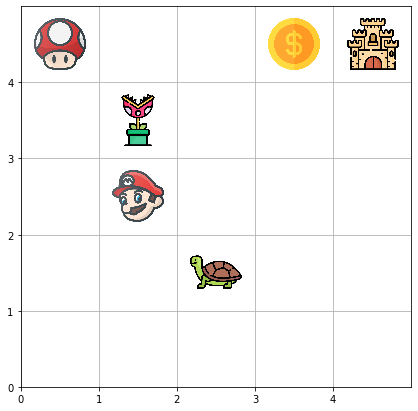


Goal Reached:  False
Current Position:  [1 2]
Chosen Action:  Left
Reward:  15
####################################################### 



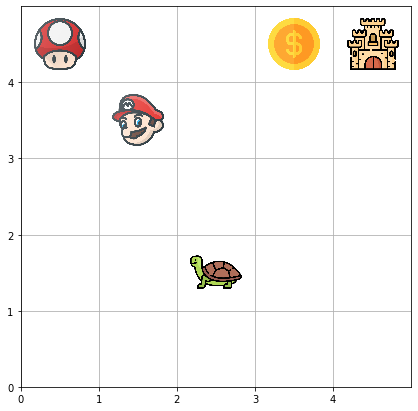


Goal Reached:  False
Current Position:  [1 3]
Chosen Action:  Up
Reward:  -25
####################################################### 



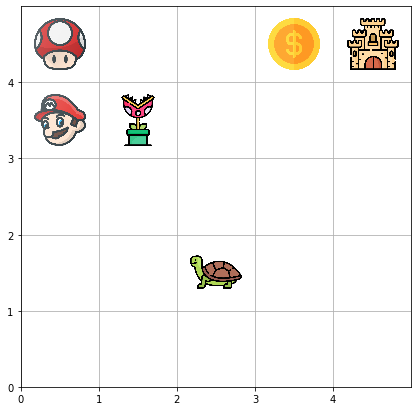


Goal Reached:  False
Current Position:  [0 3]
Chosen Action:  Left
Reward:  0
####################################################### 



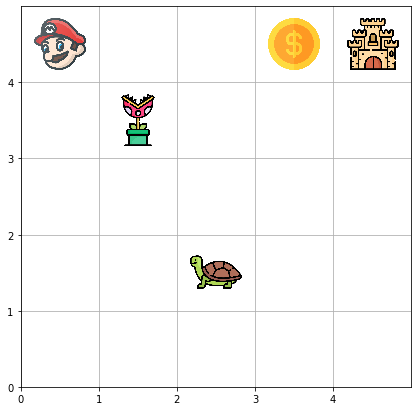


Goal Reached:  False
Current Position:  [0 4]
Chosen Action:  Up
Reward:  50
####################################################### 



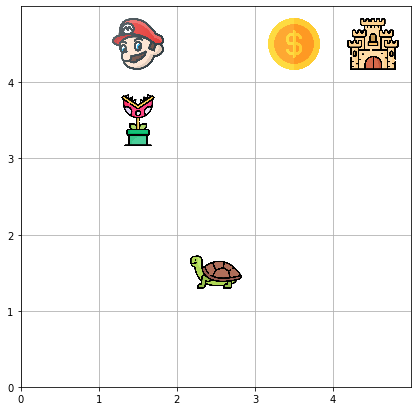


Goal Reached:  False
Current Position:  [1 4]
Chosen Action:  Right
Reward:  0
####################################################### 



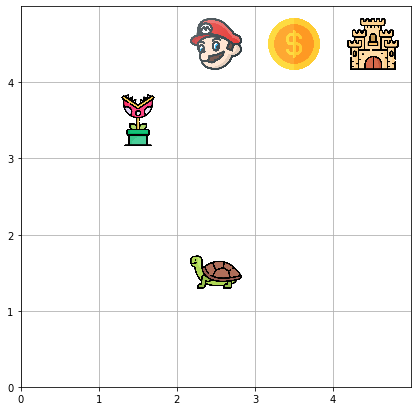


Goal Reached:  False
Current Position:  [2 4]
Chosen Action:  Right
Reward:  0
####################################################### 



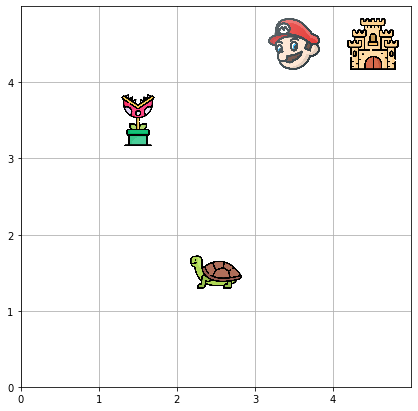


Goal Reached:  False
Current Position:  [3 4]
Chosen Action:  Right
Reward:  15
####################################################### 



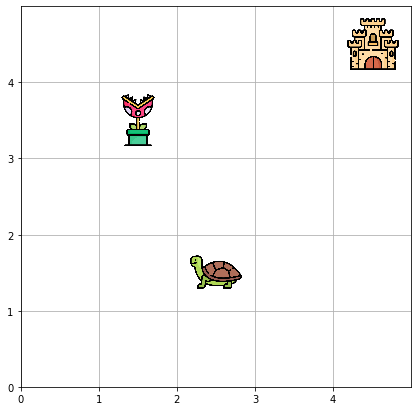


Goal Reached:  True
Current Position:  [4 4]
Chosen Action:  Right
Reward:  100
####################################################### 



In [4]:
mario_world = Mario()
mario_world.reset()
no_choice = mario_world.action_space
inputs = mario_world.key_inputs

output_grid = widgets.Grid(1, 1)

# for i in range(0,12):
for i in [2,2,0,0,2,3,3,0,3,0,2,2,2,2]:
  # action_no = np.random.choice(no_choice.n)
  action_no = i
  result = mario_world.step(inputs[action_no])
  mario_world.render()

  print("\nGoal Reached: ", result["goal_achieved"])
  print("Current Position: ",result["position"])
  print("Chosen Action: ",inputs[action_no].capitalize())
  print("Reward: ",result["reward"])
  print("#"*55,"\n")